## Análise referente aos dados do conjunto Iris

In [43]:
## Importações de Bibliotecas padrão, e o dataset Iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Instanciando o dataset Iris
iris = load_iris()
## Criando um DataFrame com os dados do dataset Iris
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Adicionando a coluna target(Nosso Alvo) ao DataFrame
iris_df["target"] = iris.target

## Adicionando a coluna target_name(Nome do Alvo) ao DataFrame
iris_df["target_name"] = iris_df["target"].map(dict(enumerate(iris.target_names)))  

### Agora irei analisar por cima quais informações constam no DataFrame, com funções padrão head, describe, value_count, info e etc

In [3]:
## Chamando a função head() para mostrar as 5 primeiras linhas do DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
## Chamando a função info() para mostrar informações do DataFrame
## Algumas informações de destaque é que nenhuma linha possui valores nulos e que todas as colunas são do tipo float64, exceto claro nossos alvos
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Logo no item "Verifique a necessidade de limpeza dos dados", até o momento não foi necessário

In [5]:
## Chamando a função describe() para mostrar informações estatísticas do DataFrame
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### No item "Descreva as medidas de tendências central do conjunto"
### São 150 instâncias totais

In [33]:
## Criando uma função que me retorna a média, mediana e moda de todas colunas de um DataFrame
from scipy import stats

def get_stats(df):
    for column in df.columns:
        mean = df[column].mean().round(2)
        median = df[column].median().round(2)
        mode = stats.mode(df[column])
        print(f'Sobre a coluna {column} temos:\nMédia: {mean}\nMediana: {median}\nModa: {mode.mode}')

## Chamando a função get_stats() para o dataframe iris_df
get_stats(iris_df.drop(columns=["target", "target_name"]))

Sobre a coluna sepal length (cm) temos:
Média: 5.84
Mediana: 5.8
Moda: 5.0
Sobre a coluna sepal width (cm) temos:
Média: 3.06
Mediana: 3.0
Moda: 3.0
Sobre a coluna petal length (cm) temos:
Média: 3.76
Mediana: 4.35
Moda: 1.4
Sobre a coluna petal width (cm) temos:
Média: 1.2
Mediana: 1.3
Moda: 0.2


In [59]:
## Aplicando a função value_counts na coluna target_name podemos os tipos de flor e a quantidade de cada no dataset
iris_df.value_counts('target_name')

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Logo temos 3 espécies(classes): Setosa, Versicolor, Virginica. Cada uma com 50 observações.

In [34]:
## Vou separar o DataFrame em 3, um para cada tipo de flor
setosa = iris_df[iris_df["target_name"] == "setosa"].drop(columns=["target", "target_name"])
versicolor = iris_df[iris_df["target_name"] == "versicolor"].drop(columns=["target", "target_name"])
virginica = iris_df[iris_df["target_name"] == "virginica"].drop(columns=["target", "target_name"])

### Descrevendo as medidas de tendência central por conjunto de espécie:

In [36]:
### Reutilizando a função get_stats() para cada DataFrame
print("Setosa")
get_stats(setosa)

Setosa
Sobre a coluna sepal length (cm) temos:
Média: 5.01
Mediana: 5.0
Moda: 5.0
Sobre a coluna sepal width (cm) temos:
Média: 3.43
Mediana: 3.4
Moda: 3.4
Sobre a coluna petal length (cm) temos:
Média: 1.46
Mediana: 1.5
Moda: 1.4
Sobre a coluna petal width (cm) temos:
Média: 0.25
Mediana: 0.2
Moda: 0.2


In [37]:
print("Versicolor")
get_stats(versicolor)

Versicolor
Sobre a coluna sepal length (cm) temos:
Média: 5.94
Mediana: 5.9
Moda: 5.5
Sobre a coluna sepal width (cm) temos:
Média: 2.77
Mediana: 2.8
Moda: 3.0
Sobre a coluna petal length (cm) temos:
Média: 4.26
Mediana: 4.35
Moda: 4.5
Sobre a coluna petal width (cm) temos:
Média: 1.33
Mediana: 1.3
Moda: 1.3


In [38]:
print("Virginica")
get_stats(virginica)

Virginica
Sobre a coluna sepal length (cm) temos:
Média: 6.59
Mediana: 6.5
Moda: 6.3
Sobre a coluna sepal width (cm) temos:
Média: 2.97
Mediana: 3.0
Moda: 3.0
Sobre a coluna petal length (cm) temos:
Média: 5.55
Mediana: 5.55
Moda: 5.1
Sobre a coluna petal width (cm) temos:
Média: 2.03
Mediana: 2.0
Moda: 1.8


### Gráfico de distribuição das variáveis de todo conjunto

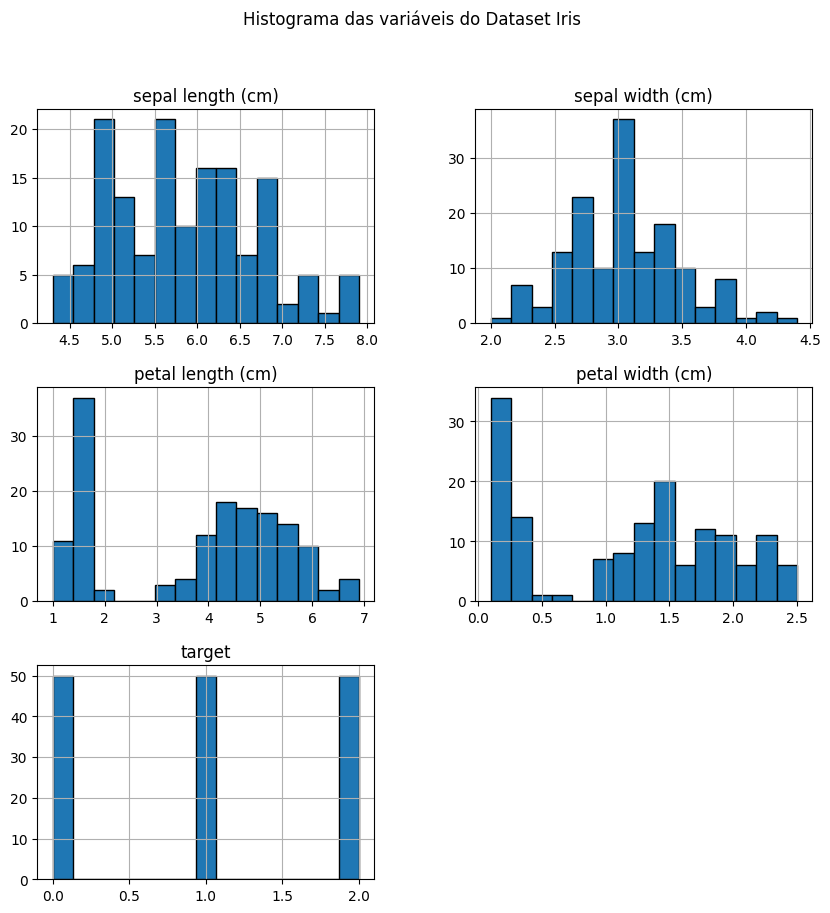

In [40]:
iris_df.hist(figsize=(10, 10), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis do Dataset Iris")
plt.show()

### Gráfico de distribuição das variáveis por espécie

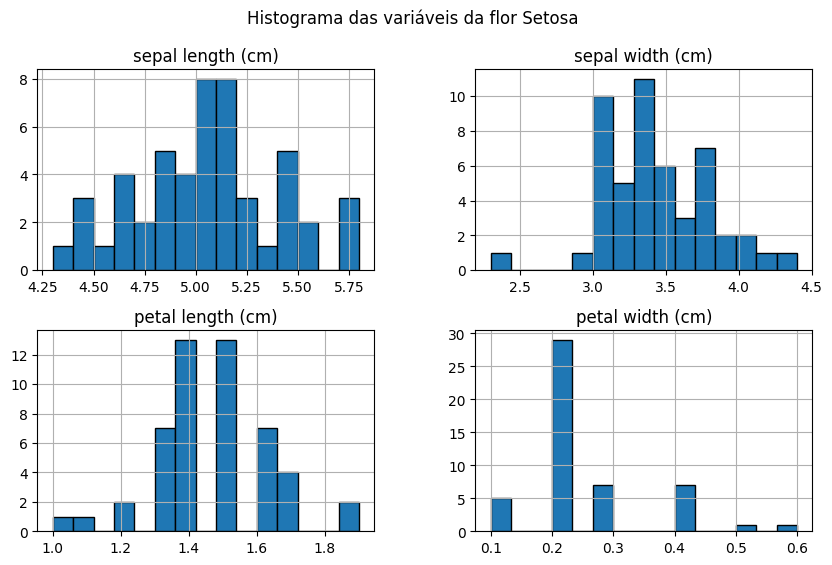

In [46]:
setosa.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis da flor Setosa")
plt.show()

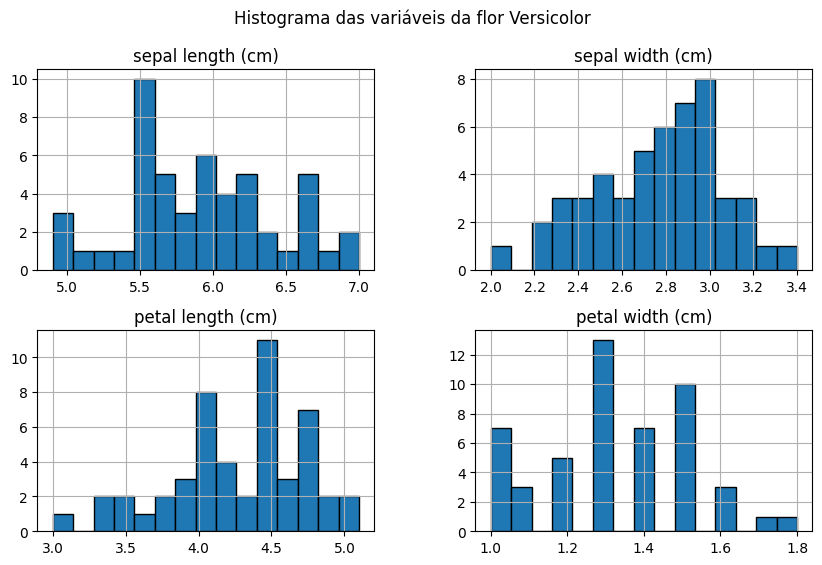

In [49]:
versicolor.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis da flor Versicolor")
plt.show()

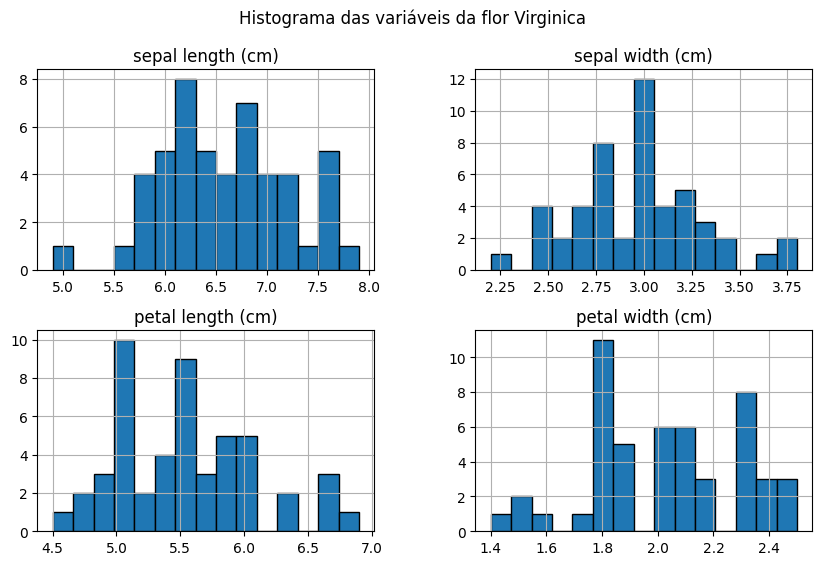

In [50]:
virginica.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis da flor Virginica")
plt.show()

### Gráfico de correlação

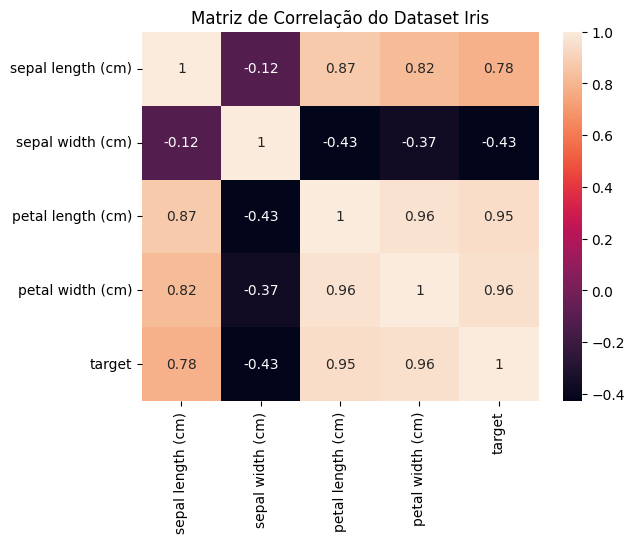

In [56]:
corr_matrix = iris_df.drop(columns=['target_name']).corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlação do Dataset Iris")
plt.show()

In [57]:
corr_matrix['target'].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [60]:
print(2+2)

4
